# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


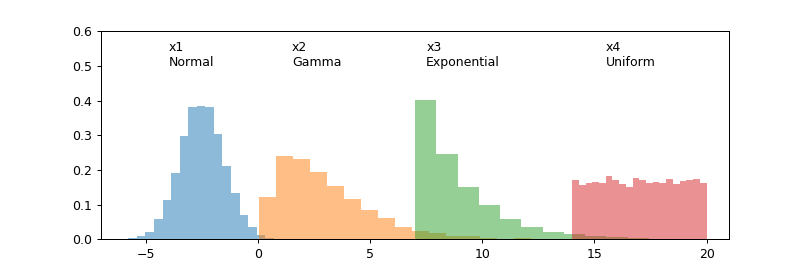

In [60]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [73]:
import matplotlib.animation as animation

n = 10000
stp = 1000
    
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr*stp == n: 
        a.event_source.stop()
        
    bins = np.arange(-7, 20, 0.5)
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(223)
    ax4 = plt.subplot(224)
    
    axs = [ax1, ax2, ax3, ax4]
    xs = [x1,x2,x3,x4]
    color = ['blue', 'orange', 'green', 'red']
    title = ['Normal', 'Gamma', 'Exponential', 'Uniform']
    
    for i in range(0,len(axs)):
        axs[i].cla()
        axs[i].hist(xs[i][:curr*stp], bins=bins, normed=False, color=color[i], alpha=0.5)
        axs[i].axis([-7,20,0,2000])
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Value')
        axs[i].set_title(title[i])

    plt.annotate('n = {}'.format(curr*stp), [10,1800])
    plt.subplots_adjust(hspace=.5)


<IPython.core.display.Javascript object>


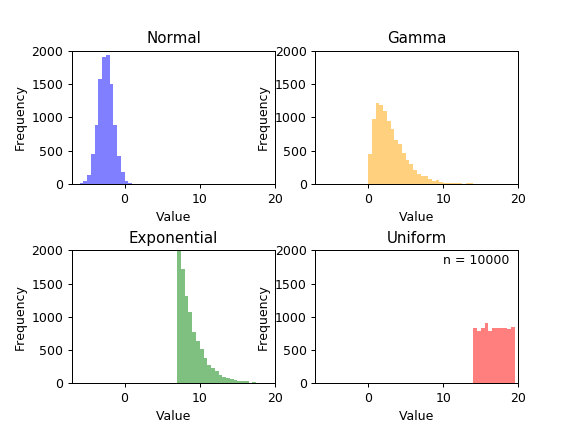

In [74]:
fig = plt.figure(2)
a = animation.FuncAnimation(fig, update, interval=1000)